In [259]:
# Initial imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

## Loading and Preprocessing WHO Data

In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
# Loading data
import pandas as pd
import os

who_data_df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_Project/WHO_country_ML_wNaN.csv')
who_data_df

,DIM_GEO_NAME,DIM_GEO_CODE,region,sub-region,DIM_TIME_YEAR,AMR_INFECT_ECOLI,AMR_INFECT_MRSA,FINPROTECTION_CATA_TOT_10_POP,FINPROTECTION_CATA_TOT_25_POP,GHED_GGHE-DGGE_SHA2011,...,UHC_INDEX_REPORTED,VACCINEPREVENTABLE_WILDPOLIO,VIOLENCE_HOMICIDERATE,WHOSIS_000003,WHS4_100,WSH_DOMESTIC_WASTE_SAFELY_TREATED,WSH_HYGIENE_BASIC,WSH_SANITATION_SAFELY_MANAGED,WSH_WATER_SAFELY_MANAGED,Healthy life expectancy at birth
0,Afghanistan,AFG,Asia,Southern Asia,2016,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.924999
1,Afghanistan,AFG,Asia,Southern Asia,2018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.575001
2,Afghanistan,AFG,Asia,Southern Asia,2019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.900002
3,Afghanistan,AFG,Asia,Southern Asia,2021,NaN,NaN,NaN,NaN,4.05,...,40.884609,NaN,8.378230,NaN,NaN,NaN,NaN,NaN,NaN,54.549999
4,Afghanistan,AFG,Asia,Southern Asia,2022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.489811,69.0,NaN,48.214699,NaN,30.03410,54.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.099998
923,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.575001
924,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2021,NaN,NaN,NaN,NaN,5.21,...,55.042839,NaN,12.219641,NaN,NaN,NaN,NaN,NaN,NaN,54.049999
925,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.264170,90.0,54.782791,42.456089,31.806431,26.51643,54.525002


# 1) Analysis without Geographical features

In [262]:
# Define features set
X = who_data_df.drop(columns=["DIM_GEO_NAME", "DIM_GEO_CODE", "region", "sub-region", "DIM_TIME_YEAR", "Healthy life expectancy at birth"])
X.head()

,AMR_INFECT_ECOLI,AMR_INFECT_MRSA,FINPROTECTION_CATA_TOT_10_POP,FINPROTECTION_CATA_TOT_25_POP,GHED_GGHE-DGGE_SHA2011,GLASSAMC_AWARE,HWF_0001,HWF_0006,HWF_0010,HWF_0014,...,SUD_TREATMENTSERVICES_COVERAGE,UHC_INDEX_REPORTED,VACCINEPREVENTABLE_WILDPOLIO,VIOLENCE_HOMICIDERATE,WHOSIS_000003,WHS4_100,WSH_DOMESTIC_WASTE_SAFELY_TREATED,WSH_HYGIENE_BASIC,WSH_SANITATION_SAFELY_MANAGED,WSH_WATER_SAFELY_MANAGED
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.52,NaN,0.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,NaN,...,NaN,40.884609,NaN,8.37823,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.489811,69.0,NaN,48.214699,NaN,30.0341


In [263]:
# Define target vector
y = who_data_df["Healthy life expectancy at birth"]
y.head()

,Healthy life expectancy at birth
0,52.924999
1,53.575001
2,53.900002
3,54.549999
4,54.875000


In [264]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Fitting the Random Forest Regressor

In [265]:
# Create the random forest regressor instance
rf_regressor = RandomForestRegressor(
    n_estimators=500,
    random_state=78
    )


In [266]:
# Fit the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=78)

## Making Predictions Using the Random Forest Regressor Model

In [267]:
# Making predictions using the testing data
predictions = rf_regressor.predict(X_test)

## Model Evaluation

In [268]:
# Regression evaluation metrics using scikit-learn

# Mean Absolute Error (MAE):
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE):
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE):
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared (R²):
r2 = r2_score(y_test, predictions)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 2.8177894075860634
Mean Squared Error (MSE): 14.681086360143938
Root Mean Squared Error (RMSE): 3.8315905783556703
R-squared (R²): 0.5588363436550626


## Mean Absolute Error (MAE):

Value: 2.82
Interpretation: On average, the model's predictions are off by about 2.82 years from the actual healthy life expectancy. This metric provides a straightforward interpretation of the average error in the same units as the target variable.

## Mean Squared Error (MSE):

Value: 14.68
Interpretation: This metric squares the errors before averaging, which means larger errors have a disproportionately larger impact. It indicates the average of the squared differences between predicted and actual values, suggesting the model's overall error magnitude.

## Root Mean Squared Error (RMSE):

Value: 3.83
Interpretation: RMSE is the square root of MSE and is also in the same units as the target variable. It indicates that the model's predictions deviate from actual values by about 3.83 years on average. RMSE is sensitive to outliers, so it can be a good measure of model performance when large errors are particularly undesirable.

## R-squared (R²):

Value: 0.56
Interpretation: This value indicates that approximately 56% of the variance in healthy life expectancy can be explained by the model's predictors. An R² value closer to 1 suggests a better fit, while values closer to 0 indicate that the model does not explain much of the variability in the target variable.

## Summary
Overall, the model seems to provide a reasonable fit, explaining a moderate amount of variance in healthy life expectancy. However, the MAE and RMSE indicate that there is still a significant average error in predictions, which suggests room for improvement, possibly through feature engineering, additional data, or trying different modeling techniques.






## Feature Importance

In [269]:
# Get the feature importance array
importances = rf_regressor.feature_importances_

In [270]:
# List the top 10 most important features
imp_features = sorted(zip(importances, X.columns), reverse=True)
top10 = imp_features[:10]
top10

[(0.1317077763485363, 'SDGIHR2021'),
 (0.09730443126288232, 'SDGIPV12M'),
 (0.08171870341360399, 'SDGWSHBOD'),
 (0.0813753226172164, 'MDG_0000000003'),
 (0.07150654899428036, 'UHC_INDEX_REPORTED'),
 (0.07032828197475861, 'MDG_0000000026'),
 (0.06770357031694166, 'HWF_0001'),
 (0.054892263701469074, 'SDGFPALL'),
 (0.04342778624413089, 'FINPROTECTION_CATA_TOT_10_POP'),
 (0.029473154757111302, 'FINPROTECTION_CATA_TOT_25_POP')]

In [271]:
# Feature importance
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame of feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False).head(8)


print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
               feature  importance
36          SDGIHR2021    0.131708
37           SDGIPV12M    0.097304
45           SDGWSHBOD    0.081719
12      MDG_0000000003    0.081375
47  UHC_INDEX_REPORTED    0.071507
16      MDG_0000000026    0.070328
6             HWF_0001    0.067704
31            SDGFPALL    0.054892


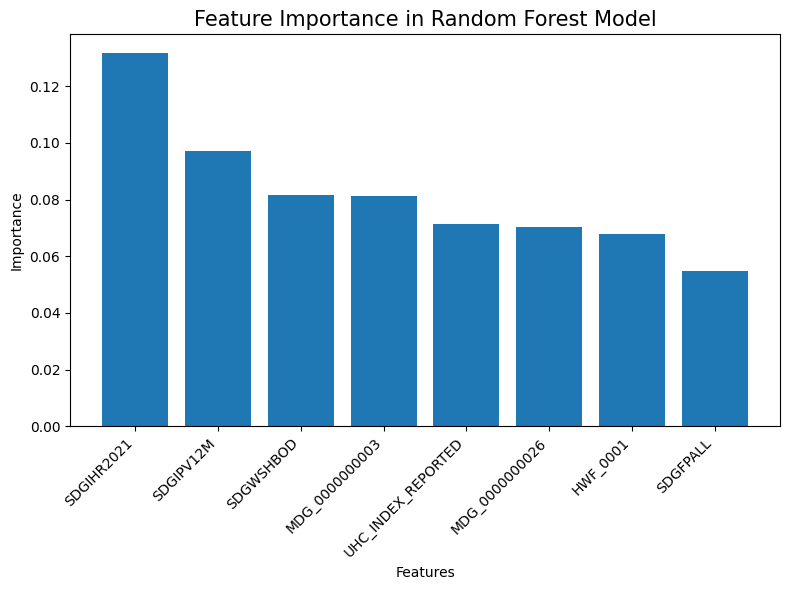

In [272]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Random Forest Model', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [273]:
#Checking for overfitting
rf_regressor.fit(X_train, y_train)

train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score:  {test_r2:.4f}")
print(f"   Training MSE:      {train_mse:.4f}")
print(f"   Testing MSE:       {test_mse:.4f}")

Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.9232
   Testing R² Score:  0.5588
   Training MSE:      2.7746
   Testing MSE:       14.6811


# 2) Same analysis WITH REGION

In [274]:
# Define features set
who_data_region_df = who_data_df.drop(columns=["DIM_GEO_NAME", "DIM_GEO_CODE", "sub-region", "DIM_TIME_YEAR",])
who_data_region_df.head()

,region,AMR_INFECT_ECOLI,AMR_INFECT_MRSA,FINPROTECTION_CATA_TOT_10_POP,FINPROTECTION_CATA_TOT_25_POP,GHED_GGHE-DGGE_SHA2011,GLASSAMC_AWARE,HWF_0001,HWF_0006,HWF_0010,...,UHC_INDEX_REPORTED,VACCINEPREVENTABLE_WILDPOLIO,VIOLENCE_HOMICIDERATE,WHOSIS_000003,WHS4_100,WSH_DOMESTIC_WASTE_SAFELY_TREATED,WSH_HYGIENE_BASIC,WSH_SANITATION_SAFELY_MANAGED,WSH_WATER_SAFELY_MANAGED,Healthy life expectancy at birth
0,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.924999
1,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.575001
2,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.900002
3,Asia,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,...,40.884609,NaN,8.37823,NaN,NaN,NaN,NaN,NaN,NaN,54.549999
4,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.489811,69.0,NaN,48.214699,NaN,30.0341,54.875000


In [275]:
# Create dummie variables for region
region_dummies = pd.get_dummies(who_data_region_df["region"]).astype(int)
region_dummies.head()

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [276]:
# Join the the region_dummies and the who_data_region_df
who_data_region_df = pd.concat([who_data_region_df, region_dummies], axis=1)

# Drop the region column and the target column to get the the features set
X1 = who_data_region_df.drop(columns=["region", "Healthy life expectancy at birth"])
X1.head()

,AMR_INFECT_ECOLI,AMR_INFECT_MRSA,FINPROTECTION_CATA_TOT_10_POP,FINPROTECTION_CATA_TOT_25_POP,GHED_GGHE-DGGE_SHA2011,GLASSAMC_AWARE,HWF_0001,HWF_0006,HWF_0010,HWF_0014,...,WHS4_100,WSH_DOMESTIC_WASTE_SAFELY_TREATED,WSH_HYGIENE_BASIC,WSH_SANITATION_SAFELY_MANAGED,WSH_WATER_SAFELY_MANAGED,Africa,Americas,Asia,Europe,Oceania
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.52,NaN,0.292,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
3,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,NaN,48.214699,NaN,30.0341,0,0,1,0,0


In [277]:
# Define target vector
y1 = who_data_region_df["Healthy life expectancy at birth"]
y1.head()

,Healthy life expectancy at birth
0,52.924999
1,53.575001
2,53.900002
3,54.549999
4,54.875000


In [278]:
# Splitting into Train and Test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=78)

## Fitting the Random Forest Regressor

In [279]:
# Create the random forest regressor instance
rf_regressor1 = RandomForestRegressor(n_estimators=500, random_state=78)

In [280]:
# Fit the model
rf_regressor1.fit(X1_train, y1_train)

RandomForestRegressor(n_estimators=500, random_state=78)

## Making Predictions Using the Random Forest Regressor Model

In [281]:
# Making predictions using the testing data
predictions1 = rf_regressor1.predict(X1_test)

## Model Evaluation

In [282]:
# Regression evaluation metrics using scikit-learn

# Mean Absolute Error (MAE):
mae1 = mean_absolute_error(y1_test, predictions1)
print(f'Region Mean Absolute Error (MAE): {mae1}')

# Mean Squared Error (MSE):
mse1 = mean_squared_error(y1_test, predictions1)
print(f'Region Mean Squared Error (MSE): {mse1}')

# Root Mean Squared Error (RMSE):
rmse1 = np.sqrt(mean_squared_error(y1_test, predictions1))
print(f'Region Root Mean Squared Error (RMSE): {rmse1}')

# R-squared (R²):
r2a = r2_score(y1_test, predictions1)
print(f'Region R-squared (R²): {r2a}')

Region Mean Absolute Error (MAE): 2.1040831047063255
Region Mean Squared Error (MSE): 8.100681348050198
Region Root Mean Squared Error (RMSE): 2.846169592285428
Region R-squared (R²): 0.7565761746288084


## Feature Importance

In [283]:
# Get the feature importance array
importances1 = rf_regressor1.feature_importances_

In [284]:
# List the top 10 most important features
imp_features1 = sorted(zip(importances1, X1.columns), reverse=True)
top10a = imp_features1[:10]
top10a

[(0.5374283065639109, 'Africa'),
 (0.060233971446588486, 'Europe'),
 (0.03783691652092642, 'SDGIHR2021'),
 (0.02323530947713734, 'MDG_0000000003'),
 (0.02210504497457881, 'MDG_0000000026'),
 (0.021401562331728, 'UHC_INDEX_REPORTED'),
 (0.02050106289354272, 'SDGIPV12M'),
 (0.019665780876539068, 'NCDMORT3070'),
 (0.01961765237145426, 'SDGFPALL'),
 (0.019537783415390808, 'SDGAIRBODA')]

In [301]:
# Feature importance
feature_importance_region = rf_regressor1.feature_importances_
feature_names_region = X1.columns.tolist()

# Create a DataFrame of feature importances
feature_importance_region = pd.DataFrame({
    'feature': X1.columns,
    'importance': rf_regressor1.feature_importances_
}).sort_values('importance', ascending=False).head(8)


print("\nFeature Importances:")
print(feature_importance_region)


Feature Importances:
               feature  importance
56              Africa    0.537428
59              Europe    0.060234
36          SDGIHR2021    0.037837
12      MDG_0000000003    0.023235
16      MDG_0000000026    0.022105
47  UHC_INDEX_REPORTED    0.021402
37           SDGIPV12M    0.020501
18         NCDMORT3070    0.019666


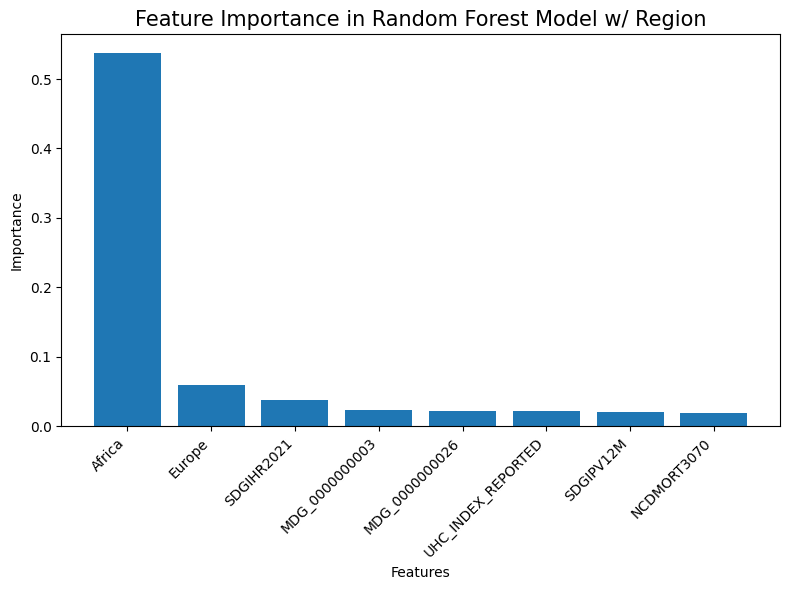

In [299]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_region['feature'], feature_importance_region['importance'])
plt.title('Feature Importance in Random Forest Model w/ Region', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [304]:
#Checking for overfitting
rf_regressor1.fit(X1_train, y1_train)

train_pred1 = rf_regressor1.predict(X1_train)
test_pred1 = rf_regressor1.predict(X1_test)

train_r2_1 = r2_score(y1_train, train_pred1)
test_r2_1 = r2_score(y1_test, test_pred1)

train_mse1 = mean_squared_error(y1_train, train_pred1)
test_mse1 = mean_squared_error(y1_test, test_pred1)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2_1:.4f}")
print(f"   Testing R² Score:  {test_r2_1:.4f}")
print(f"   Training MSE:      {train_mse1:.4f}")
print(f"   Testing MSE:       {test_mse1:.4f}")

Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.9400
   Testing R² Score:  0.7566
   Training MSE:      2.1682
   Testing MSE:       8.1007


# 3) Same analysis WITH SUB-REGION

In [285]:
# Define features set
who_data_subregion_df = who_data_df.drop(columns=["DIM_GEO_NAME", "DIM_GEO_CODE", "region", "DIM_TIME_YEAR",])
who_data_subregion_df.head()

,sub-region,AMR_INFECT_ECOLI,AMR_INFECT_MRSA,FINPROTECTION_CATA_TOT_10_POP,FINPROTECTION_CATA_TOT_25_POP,GHED_GGHE-DGGE_SHA2011,GLASSAMC_AWARE,HWF_0001,HWF_0006,HWF_0010,...,UHC_INDEX_REPORTED,VACCINEPREVENTABLE_WILDPOLIO,VIOLENCE_HOMICIDERATE,WHOSIS_000003,WHS4_100,WSH_DOMESTIC_WASTE_SAFELY_TREATED,WSH_HYGIENE_BASIC,WSH_SANITATION_SAFELY_MANAGED,WSH_WATER_SAFELY_MANAGED,Healthy life expectancy at birth
0,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.924999
1,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.575001
2,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.900002
3,Southern Asia,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,...,40.884609,NaN,8.37823,NaN,NaN,NaN,NaN,NaN,NaN,54.549999
4,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.489811,69.0,NaN,48.214699,NaN,30.0341,54.875000


In [286]:
# Create dummie variables for sub-region
subregion_dummies = pd.get_dummies(who_data_subregion_df["sub-region"]).astype(int)
subregion_dummies.head()

,Australia and New Zealand,Central Asia,Eastern Asia,Eastern Europe,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [287]:
# Join the the subregion_dummies and the who_data_subregion_df
who_data_subregion_df = pd.concat([who_data_subregion_df, subregion_dummies], axis=1)

# Drop the sub-region column and the target column to get the the features set
X2 = who_data_subregion_df.drop(columns=["sub-region", "Healthy life expectancy at birth"])
X2.head()

,AMR_INFECT_ECOLI,AMR_INFECT_MRSA,FINPROTECTION_CATA_TOT_10_POP,FINPROTECTION_CATA_TOT_25_POP,GHED_GGHE-DGGE_SHA2011,GLASSAMC_AWARE,HWF_0001,HWF_0006,HWF_0010,HWF_0014,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.52,NaN,0.292,...,0,0,0,0,0,1,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,NaN,...,0,0,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [288]:
# Define target vector
y2 = who_data_subregion_df["Healthy life expectancy at birth"]
y2.head()

,Healthy life expectancy at birth
0,52.924999
1,53.575001
2,53.900002
3,54.549999
4,54.875000


In [289]:
# Splitting into Train and Test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

## Fitting the Random Forest Regressor

In [290]:
# Create the random forest regressor instance
rf_regressor2 = RandomForestRegressor(n_estimators=500, random_state=78)

In [291]:
# Fit the model
rf_regressor2.fit(X2_train, y2_train)

RandomForestRegressor(n_estimators=500, random_state=78)

## Making Predictions Using the Random Forest Regressor Model

In [292]:
# Making predictions using the testing data
predictions2 = rf_regressor2.predict(X2_test)

## Model Evaluation

In [293]:
# Regression evaluation metrics using scikit-learn

# Mean Absolute Error (MAE):
mae2 = mean_absolute_error(y2_test, predictions2)
print(f'Sub-Region Mean Absolute Error (MAE): {mae2}')

# Mean Squared Error (MSE):
mse2 = mean_squared_error(y2_test, predictions2)
print(f'Sub-Region Mean Squared Error (MSE): {mse2}')

# Root Mean Squared Error (RMSE):
rmse2 = np.sqrt(mean_squared_error(y2_test, predictions2))
print(f'Sub-Region Root Mean Squared Error (RMSE): {rmse2}')

# R-squared (R²):
r2b = r2_score(y2_test, predictions2)
print(f'Sub-Region R-squared (R²): {r2b}')

Sub-Region Mean Absolute Error (MAE): 2.044056805753636
Sub-Region Mean Squared Error (MSE): 7.632701531954053
Sub-Region Root Mean Squared Error (RMSE): 2.762734430225615
Sub-Region R-squared (R²): 0.7706388728311083


## Feature Importance

In [294]:
# Get the feature importance array
importances2 = rf_regressor2.feature_importances_

In [295]:
# List the top 10 most important features
imp_features2 = sorted(zip(importances2, X2.columns), reverse=True)
top10b = imp_features2[:10]
top10b

[(0.599967343087071, 'Sub-Saharan Africa'),
 (0.044774162520667925, 'Southern Asia'),
 (0.029782856846375796, 'Western Europe'),
 (0.023768786279524716, 'SDGIHR2021'),
 (0.01759060680820558, 'Northern Europe'),
 (0.016895579762629113, 'Southern Europe'),
 (0.016383868985779128, 'MDG_0000000003'),
 (0.01416493198673304, 'SDGIPV12M'),
 (0.014045293390930618, 'NCDMORT3070'),
 (0.013654928616886322, 'HWF_0006')]

In [305]:
# Feature importance
feature_importance_subregion = rf_regressor2.feature_importances_
feature_names_subregion = X2.columns.tolist()

# Create a DataFrame of feature importances
feature_importance_subregion = pd.DataFrame({
    'feature': X2.columns,
    'importance': rf_regressor2.feature_importances_
}).sort_values('importance', ascending=False).head(8)


print("\nFeature Importances:")
print(feature_importance_subregion)


Feature Importances:
               feature  importance
67  Sub-Saharan Africa    0.599967
65       Southern Asia    0.044774
69      Western Europe    0.029783
36          SDGIHR2021    0.023769
63     Northern Europe    0.017591
66     Southern Europe    0.016896
12      MDG_0000000003    0.016384
37           SDGIPV12M    0.014165


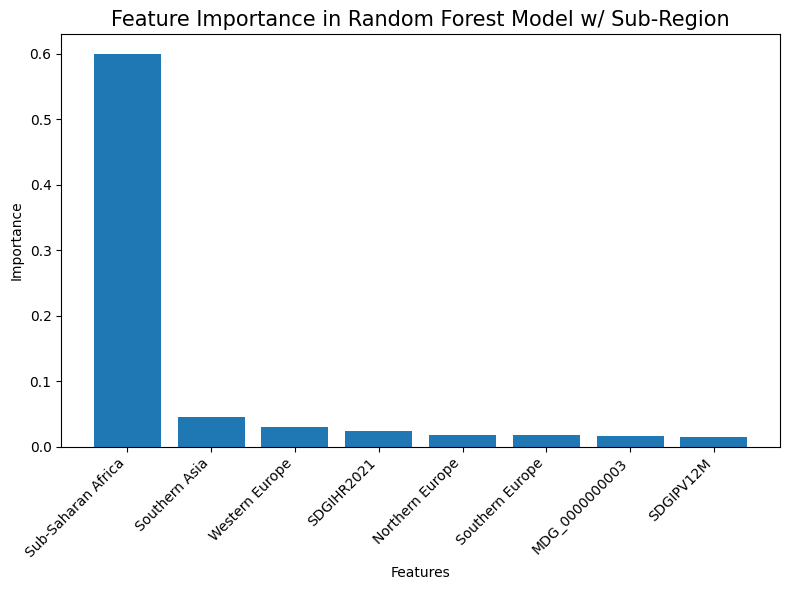

In [306]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_subregion['feature'], feature_importance_subregion['importance'])
plt.title('Feature Importance in Random Forest Model w/ Sub-Region', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [308]:
#Checking for overfitting
rf_regressor2.fit(X2_train, y2_train)

train_pred2 = rf_regressor2.predict(X2_train)
test_pred2 = rf_regressor2.predict(X2_test)

train_r2_2 = r2_score(y2_train, train_pred2)
test_r2_2 = r2_score(y2_test, test_pred2)

train_mse2 = mean_squared_error(y2_train, train_pred2)
test_mse2 = mean_squared_error(y2_test, test_pred2)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2_2:.4f}")
print(f"   Testing R² Score:  {test_r2_2:.4f}")
print(f"   Training MSE:      {train_mse2:.4f}")
print(f"   Testing MSE:       {test_mse2:.4f}")

Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.9443
   Testing R² Score:  0.7706
   Training MSE:      2.0127
   Testing MSE:       7.6327
